# Brute-force Metropolis algorithm for the interacting system with an elliptical trap.

We now simulate the interacting system using the brute-force metropolis algorithm, with a = 0.0043.  

I got some weird results from the last run for 50 particles, but got a better estimate from a previous run (that i managed to write over). The best result for 50 particles are shown in the report. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def extractInfo(file, alpha, num_dims, num_particles):
    """Function for extracting the information of interest. Assumes that the 
    file contains one last line with computational time of the code. 
    """
    
    file = open(file, "r")
    
    temp = np.array([i for i in file])
    local_energies = np.array([float(j) for j in temp[:-1]])
    
    time = temp[-1].split(" ")[-1]
    number_of_metropolis_steps = len(local_energies)
    
    total_energy = np.mean(local_energies)
    energy_per_particle = total_energy/float(num_particles)
    
    blocking_total_energy, blocking_variance = block(local_energies)
    
    total_energy_development = np.cumsum(local_energies)
    total_energy_development = np.array([energy/float(num+1) for num, energy in enumerate(total_energy_development)])
    
    accepted_steps = 0
    for i in range(1, len(local_energies)):
        if(local_energies[i] != local_energies[i-1]):
            accepted_steps += 1
    
    acceptance_ratio = accepted_steps/number_of_metropolis_steps
    
    
    return total_energy, energy_per_particle, blocking_variance, total_energy_development, time, acceptance_ratio


# from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def block(x):
    # preliminaries
    n = len(x)
    d = int(np.log2(n))
    s, gamma = np.zeros(d), np.zeros(d)
    mu = np.mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in np.arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*np.sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = np.var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (np.cumsum( ((gamma/s)**2*2**np.arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =np.array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in np.arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)

# print(extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_1_num_dims_1_alpha_0.450000.txt", 0.45, 1,1))


# 10 particles in 3 dimensions

Plots/metropolis_interacting_num_particles_10_num_dims_3.png
Alpha   Energy    Energy/particle   Var blocking   Accpetance ratio    Time [s]       
0.4     24.353    2.435329173       0.00052572     0.49011             37.03          
0.5     22.188    2.218771731       0.0016673      0.43939             36.78          
0.6     23.725    2.372519635       0.00019564     0.3982              37.07          


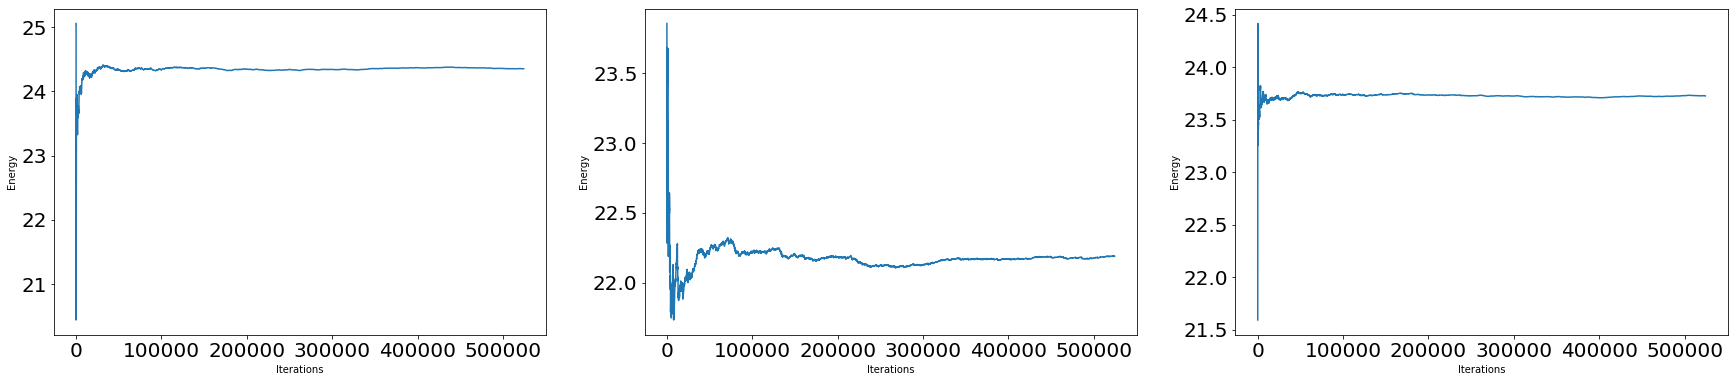

In [2]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 10
num_dims = 3
interaction = "interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = False

alpha_values = [0.4, 0.5, 0.6]

alpha_0_4 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_10_num_dims_3_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_10_num_dims_3_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_10_num_dims_3_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<10}".format("Energy") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time [s]")  )

for alpha, values in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6]):
    print("{0:<8}".format(alpha) + "{0:<10.5}".format(values[0]) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )



# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
# plt.ylim((alpha_0_4[1] - 0.05, alpha_0_4[1] + 0.05))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

if(savefigure):
    plt.savefig(plot_name)

plt.show()




# 50 particles in 3 dimensions

Plots/metropolis_interacting_num_particles_50_num_dims_3.png
Alpha   Energy    Energy/particle   Var blocking   Accpetance ratio    Time [s]       
0.4     122.29    2.445789319       0.2875         0.49969             954.4          
0.5     90.396    1.807916953       0.82747        0.45207             943.5          
0.6     118.34    2.366842972       1.1648         0.41204             944.2          


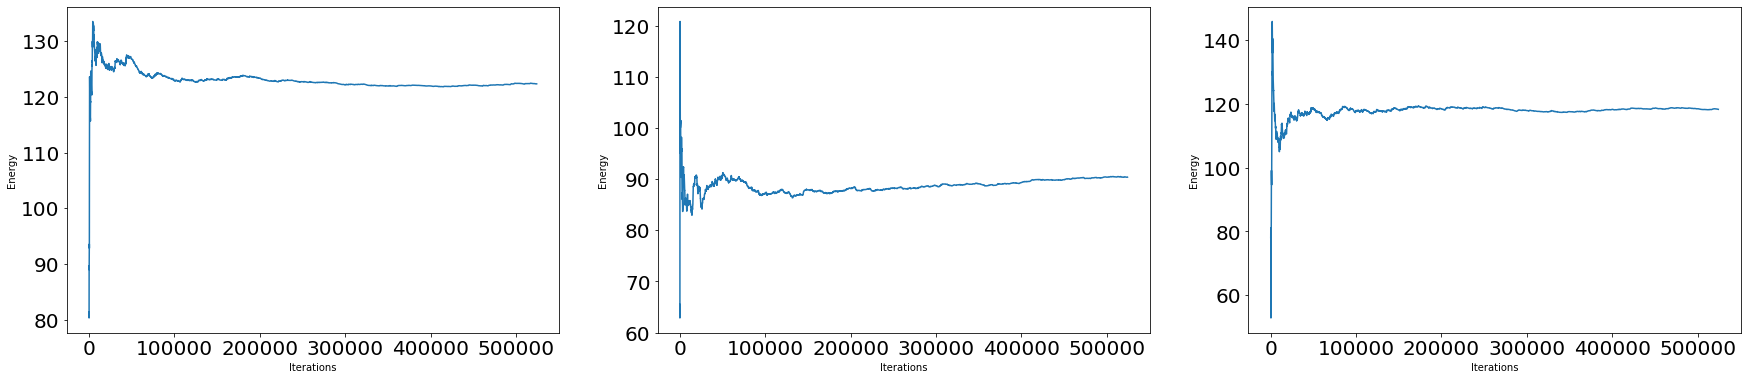

In [3]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 50
num_dims = 3
interaction = "interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = False

alpha_values = [0.4, 0.5, 0.6]

alpha_0_4 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_50_num_dims_3_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_50_num_dims_3_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_50_num_dims_3_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<10}".format("Energy") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time [s]")  )

for alpha, values in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6]):
    print("{0:<8}".format(alpha) + "{0:<10.5}".format(values[0]) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )



# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
# plt.ylim((alpha_0_4[1] - 0.05, alpha_0_4[1] + 0.05))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

if(savefigure):
    plt.savefig(plot_name)

plt.show()




Plots/error_for_100_particles.png
Alpha   Energy    Energy/particle   Var blocking   Accpetance ratio    Time [s]       
0.4     133.79    2.67572554        30.968         0.51143             3797.          
0.5     179.63    3.59259527        3.9542         0.46354             3886.          
0.6     106.75    2.134987923       14.924         0.42515             4380.          


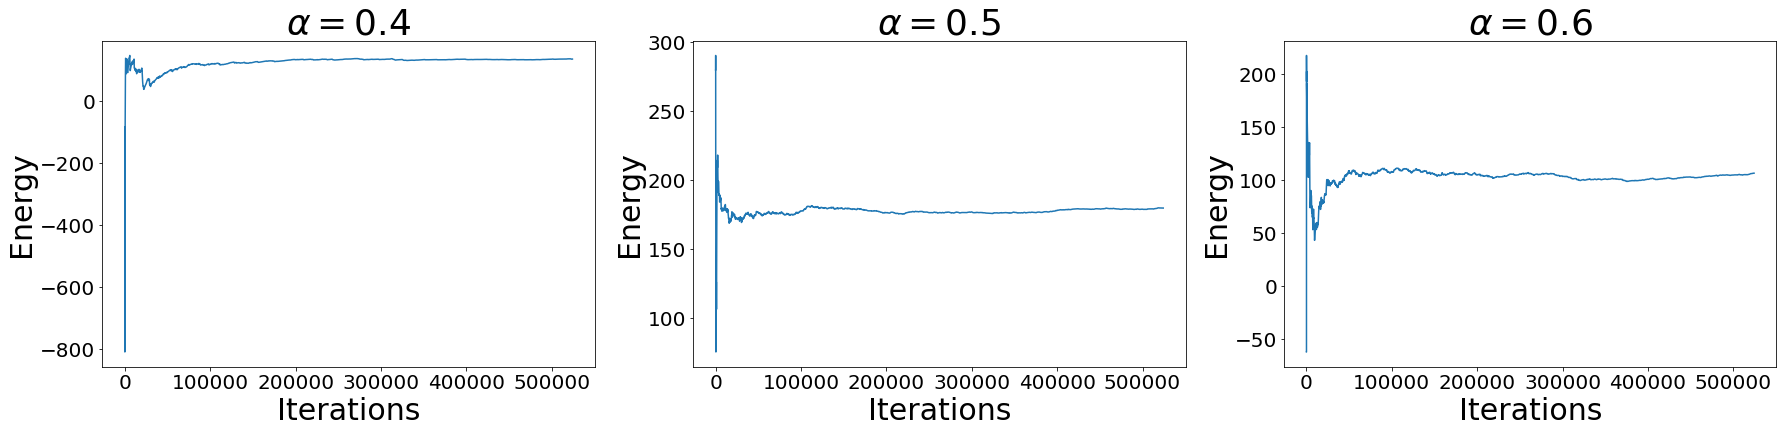

In [8]:
plt.rcParams["figure.figsize"] = 30,6
plt.rcParams["font.size"] = 30
# plt.rcParams["xtick.labelsize"] = 20
# plt.rcParams["ytick.labelsize"] = 20

num_particles = 50
num_dims = 3
interaction = "interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
plot_name = r"Plots/error_for_100_particles.png"
print(plot_name)
savefigure = True

alpha_values = [0.4, 0.5, 0.6]

alpha_0_4 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_100_num_dims_3_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_100_num_dims_3_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/interacting_metropolis_local_energy_values_a_0.004300_num_particles_100_num_dims_3_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<10}".format("Energy") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time [s]")  )

for alpha, values in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6]):
    print("{0:<8}".format(alpha) + "{0:<10.5}".format(values[0]) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )



# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title(r"$\alpha = 0.4$")

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
plt.title(r"$\alpha = 0.5$")

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title(r"$\alpha = 0.6$")
if(savefigure):
    plt.savefig(plot_name)

plt.show()


